# Các bước của thuật toán Adam
+ B1 : Khởi tạo vector m =0, v= 0 tương ứng với momentum và vận tốc ban đầu đều bằng 0
+ B2: Tính đạo hàm tại thời điểm hiện tại với:
  +  g(t) = f'(x(t-1))
+ B3: Cập nhật momentum sử dụng gradient và hyperparameter β1, vận tốc với siêu tham số β2 :
  + m(t) = β1 * m(t-1) + (1- β1) * g(t)
  + v(t) = β2 * v(t-1) + (1 - β2) * g(t)
  + Với momentum : m_hat(t) = m(t) / (1 - β1(t))
  + Với vận tốc: v_hat(t) = v(t) / (1 - β2(t))
+ B5: Tính giá trị cho tham số:
  + α(t) = α * sqrt(1-β2(t)) / (1-β1(t))
  + x(t) = x(t-1) - α * m_hat(t) / ( sqrt(v_hat(t)) - eps)
+ Lưu ý :
  + β1(t) = β1 ^ t
  + β2(t) = β2 ^ t
  + α là learning rate
  + β1 là hệ số giảm động lượng ban đầu với giá trị 0,9
  + β2 là hệ số phân rã với giá trị 0,999
  + eps là giá trị nhỏ như 1e-8 để tránh lỗi chia cho 0.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

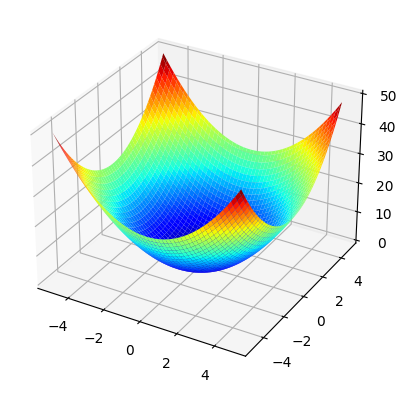

In [15]:
def objective(x,y):
  return x**2.0 + y**2.0

r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)

x, y = np.meshgrid(xaxis, yaxis)
result = objective(x,y)
axis = plt.figure().add_subplot(projection='3d')
axis.plot_surface(x,y,result, cmap='jet')
plt.show()


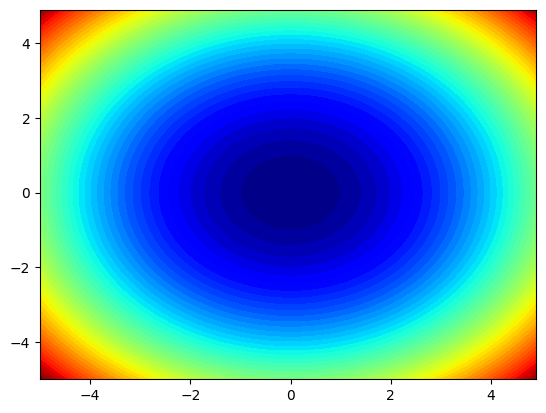

In [22]:
def objective(x,y):
  return x**2.0 + y**2.0

r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)

x, y = np.meshgrid(xaxis, yaxis)
result = objective(x,y)
# axis = plt.figure().add_subplot(projection='3d')
plt.contourf(x,y,result, levels=50, cmap='jet')
plt.show()


In [23]:
def derivative(x,y):
  return np.asarray([x*2.0 , y* 2.0])

In [43]:
def AdamOptimizer(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):

  solution = list()
  x = bounds[:,0] + np.random.rand(len(bounds)) * (bounds[:,1] - bounds[:,0])
  m = [0.0 for _ in range(bounds.shape[0])]
  v = [0.0 for _ in range(bounds.shape[0])]
  score = objective(x[0], x[1])

  for t in range(n_iter):
    g = derivative(x[0], x[1])
    for i in range(x.shape[0]):
      m[i] = beta1 * m[i] + ( 1- beta1) * g[i]
      v[i] = beta2 * v[i] + (1-beta2) * g[i]**2

      m_hat = m[i] / (1.0 - beta1**(t+1))
      v_hat = v[i] / (1.0 - beta2**(t+1))

      x[i] = x[i] - alpha * m_hat / (np.sqrt(v_hat) + eps)

      score = objective(x[0], x[1])
      solution.append(x.copy())
  return [x, score, solution]


In [44]:
np.random.seed(1)
bounds = np.asarray([[-5.0,5.0],[-5.0,5.0]])
n_iter = 1000
alpha = 0.1
beta1 = 0.8
beta2 = 0.999
best, score, solution = AdamOptimizer(objective, derivative,bounds, n_iter, alpha, beta1, beta2)
print("Best = ", best)
print("Score = ", score)
print("Solution = ", (solution))



Best =  [-3.90312614e-49 -1.22649002e-48]
Score =  1.6566217007091216e-96
Solution =  [array([-0.72977995,  2.20324493]), array([-0.72977995,  2.10324493]), array([-0.63069272,  2.10324493]), array([-0.63069272,  2.00352867]), array([-0.53329691,  2.00352867]), array([-0.53329691,  1.90430048]), array([-0.43851171,  1.90430048]), array([-0.43851171,  1.80577402]), array([-0.34739705,  1.80577402]), array([-0.34739705,  1.70817026]), array([-0.26113777,  1.70817026]), array([-0.26113777,  1.61171537]), array([-0.18100428,  1.61171537]), array([-0.18100428,  1.51663845]), array([-0.10828395,  1.51663845]), array([-0.10828395,  1.42316917]), array([-0.04418314,  1.42316917]), array([-0.04418314,  1.33153532]), array([0.01029006, 1.33153532]), array([0.01029006, 1.24196046]), array([0.05444219, 1.24196046]), array([0.05444219, 1.15466141]), array([0.08798385, 1.15466141]), array([0.08798385, 1.069846  ]), array([0.11107126, 1.069846  ]), array([0.11107126, 0.98771068]), array([0.12429294, 

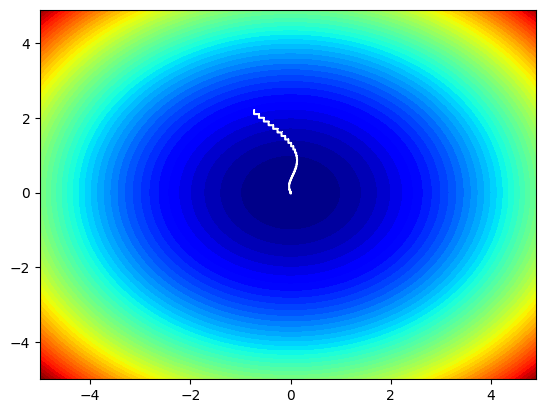

In [45]:
r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)

x, y = np.meshgrid(xaxis, yaxis)
result = objective(x,y)
plt.contourf(x,y,result, levels=50, cmap='jet')
solution = np.asarray(solution)
plt.plot(solution[:,0], solution[:,1], ',-', color='w')
plt.show()